# **PROYECTO 2 SPAM Y HAM**

# RENATTO GUZMAN

In [4]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rentt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rentt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rentt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:

# Read the CSV file
initial_data = pd.read_csv("spam.csv")
print(f"==>> data.shape: {initial_data.shape}")

initial_data = initial_data[["v1", "v2"]]
initial_data.columns = ['label', 'body_text']



==>> data.shape: (5572, 5)


### Análisis Exploratorio

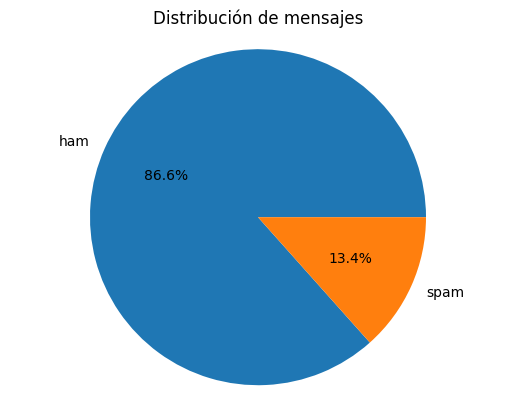

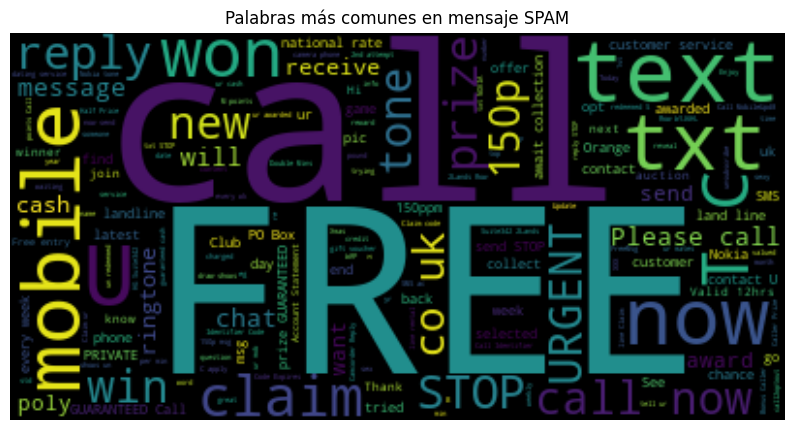

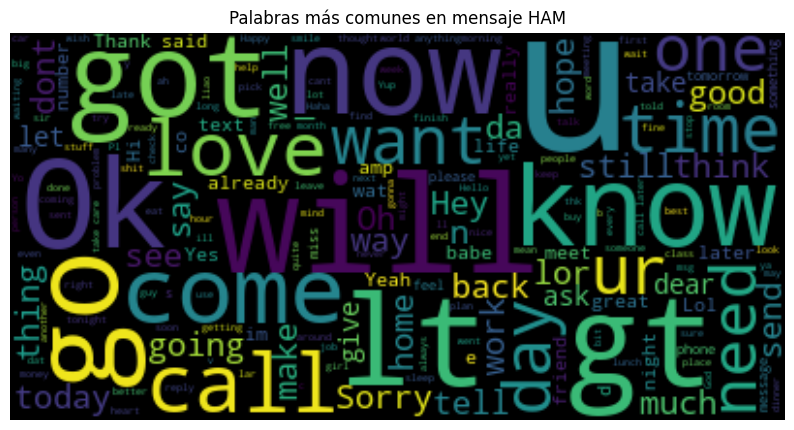

C:\Users\rentt\AppData\Local\Temp\ipykernel_36580\2418406112.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['punctuation_count'] = spam_data['body_text'].apply(count_punctuation)


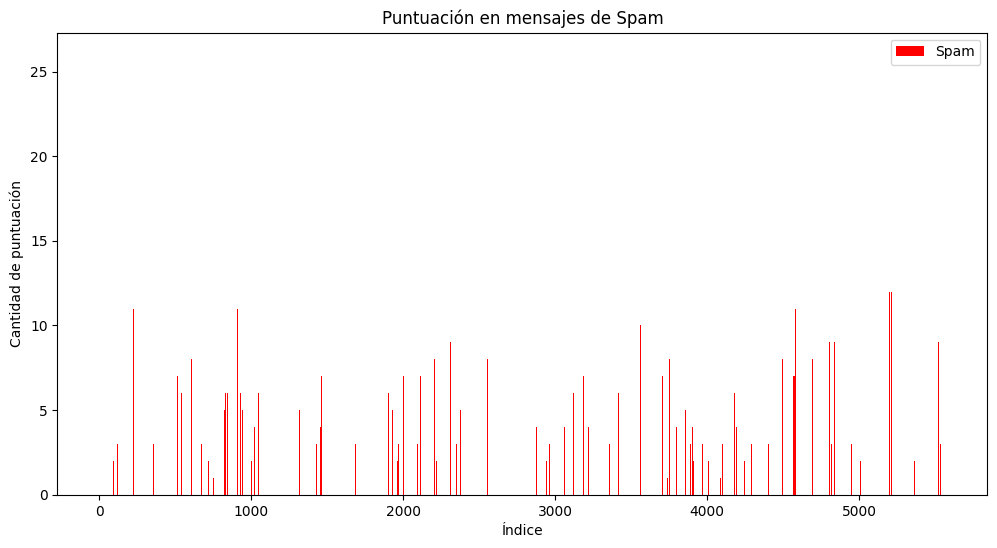

C:\Users\rentt\AppData\Local\Temp\ipykernel_36580\2418406112.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ham_data['punctuation_count'] = ham_data['body_text'].apply(count_punctuation)


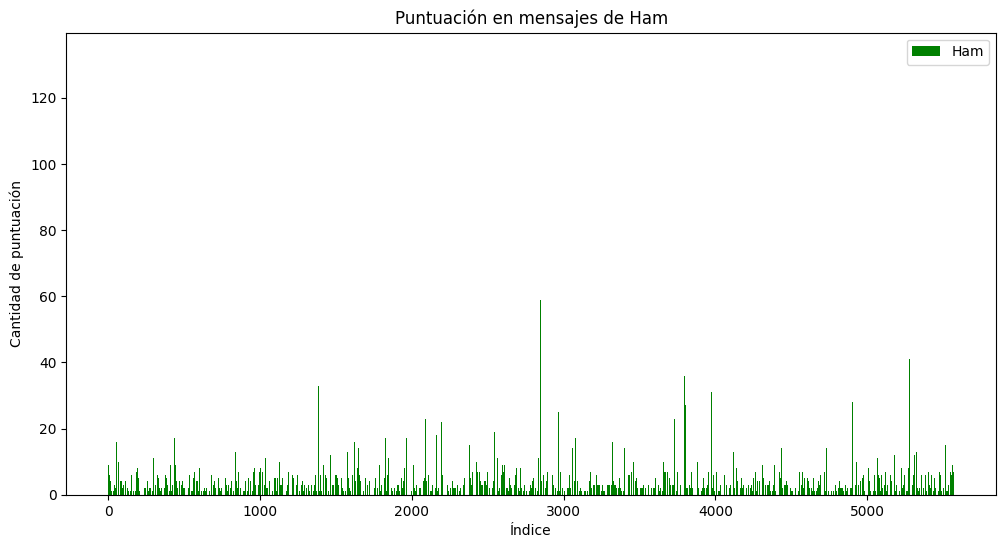

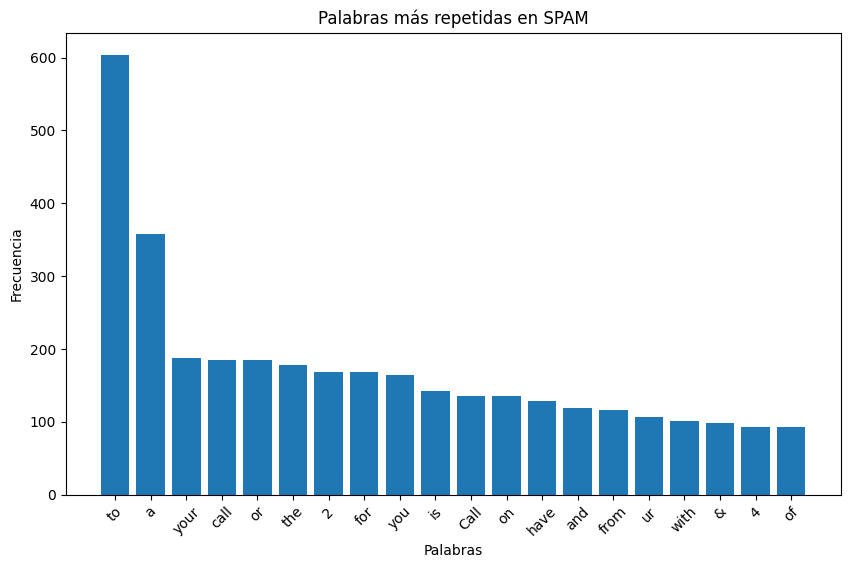

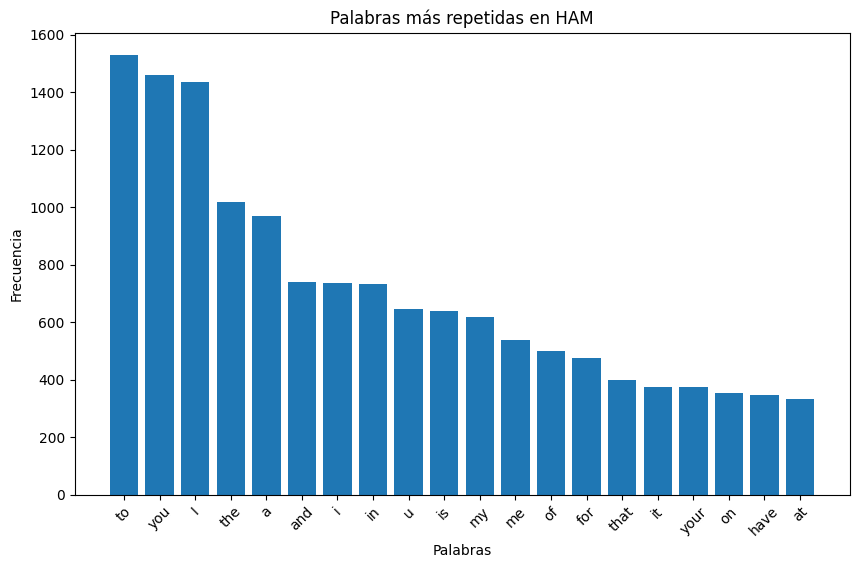

In [9]:

## Pie chart distribución de mensajes SPAM y HAM
def draw_graphs(data):
    conteo_clases = data['label'].value_counts()

    # Crear el gráfico de pie
    plt.pie(conteo_clases.values, labels=conteo_clases.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Distribución de mensajes')
    plt.show()


    ## Palabras más populares de SPAM y HAM
    spam_data = data[data['label'] == 'spam']
    ham_data = data[data['label'] == 'ham']

    spam_words = ' '.join(spam_data['body_text'])
    ham_words = ' '.join(ham_data['body_text'])

    spam_list = spam_words.split()
    ham_list = ham_words.split()


    ### WordCloud
    wordcloud_spam = WordCloud().generate(spam_words)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis('off')
    plt.title('Palabras más comunes en mensaje SPAM')
    plt.show()

    wordcloud_ham = WordCloud().generate(ham_words)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_ham, interpolation='bilinear')
    plt.title('Palabras más comunes en mensaje HAM')
    plt.axis('off')
    plt.show()

    def count_punctuation(text):
        punctuation = r'[!"\#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~]'
        return len(re.findall(punctuation, text))

    # Contar la puntuación para spam
    spam_data['punctuation_count'] = spam_data['body_text'].apply(count_punctuation)

    # Graficar puntuación para spam
    plt.figure(figsize=(12, 6))
    plt.bar(spam_data.index, spam_data['punctuation_count'], color='r', label='Spam')
    plt.xlabel('Índice')
    plt.ylabel('Cantidad de puntuación')
    plt.title('Puntuación en mensajes de Spam')
    plt.legend()
    plt.show()

    # Contar la puntuación para ham
    ham_data['punctuation_count'] = ham_data['body_text'].apply(count_punctuation)

    # Graficar puntuación para ham
    plt.figure(figsize=(12, 6))
    plt.bar(ham_data.index, ham_data['punctuation_count'], color='g', label='Ham')
    plt.xlabel('Índice')
    plt.ylabel('Cantidad de puntuación')
    plt.title('Puntuación en mensajes de Ham')
    plt.legend()
    plt.show()


    ### 20 palabras más comunes de cada uno

    # Obtener las palabras más repetidas de spam_list y ham_list
    spam_word_counts = dict()
    ham_word_counts = dict()

    for word in spam_list:
        spam_word_counts[word] = spam_word_counts.get(word, 0) + 1

    for word in ham_list:
        ham_word_counts[word] = ham_word_counts.get(word, 0) + 1

    # Obtener las palabras más repetidas en orden descendente
    top_spam_words = sorted(spam_word_counts, key=spam_word_counts.get, reverse=True)[:20]
    top_ham_words = sorted(ham_word_counts, key=ham_word_counts.get, reverse=True)[:20]

    # Crear el gráfico de barras para las palabras más repetidas de spam_list
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_spam_words)), [spam_word_counts[word] for word in top_spam_words])
    plt.xticks(range(len(top_spam_words)), top_spam_words, rotation=45)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title('Palabras más repetidas en SPAM')
    plt.show()

    # Crear el gráfico de barras para las palabras más repetidas de ham_list
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_ham_words)), [ham_word_counts[word] for word in top_ham_words])
    plt.xticks(range(len(top_ham_words)), top_ham_words, rotation=45)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title('Palabras más repetidas en HAM')
    plt.show()

draw_graphs(initial_data)

### Limpieza de datos

In [10]:
# Define the stop words
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to remove stop words, perform lemmatization, and perform stemming
def preprocess_text(text):
    
    processed_text = text.lower()
    
    #eliminar www de paginas web
    processed_text = re.sub(r'www', '', processed_text)
    
    # Eliminar "com" al final de los links
    processed_text = re.sub(r'com\b', '', processed_text)

    # Eliminar números
    processed_text = re.sub(r'\d+', '', processed_text)
    
    # Eliminar puntuación
    processed_text = re.sub(r'[^\w\s]', '', processed_text)
    
    # Eliminar espacios extras
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()
    
    # Tokenize the text into words
    words = nltk.word_tokenize(processed_text)
    
    
    # Remove stop words
    words = [word for word in words if word.lower() not in stop_words]
    
    # Perform lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Perform stemming
    words = [stemmer.stem(word) for word in words] 
    
    words = [word for word in words if len(word) >= 3]
    
    final_text = (' ').join(words)
    
    
    return final_text


def clean_data(data):

    # Apply the preprocess_text function to each element in the dataframe
    data["body_text"] = data["body_text"].apply(lambda x: preprocess_text(x))
    data.columns = ['label', 'body_text']

    # Display the modified dataframe
    data.to_csv("spam_cleaned1.csv", index=False)

    return data

data = clean_data(initial_data)

In [11]:
text = "GUARANTEED"

print(preprocess_text(text))

guarante


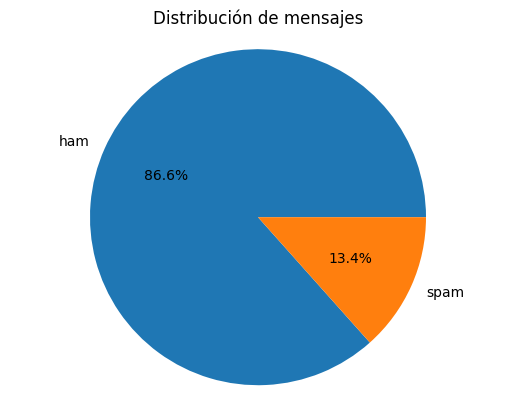

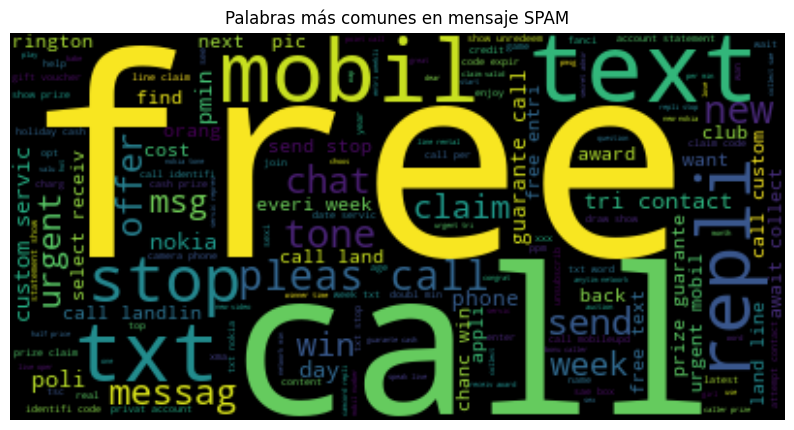

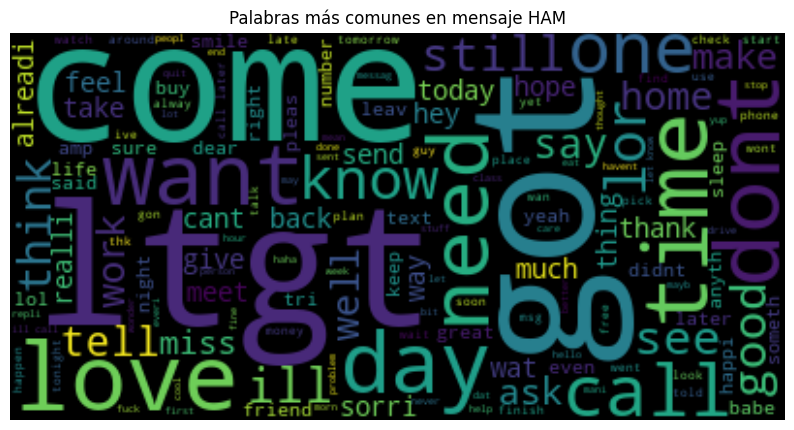

C:\Users\rentt\AppData\Local\Temp\ipykernel_36580\2418406112.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['punctuation_count'] = spam_data['body_text'].apply(count_punctuation)


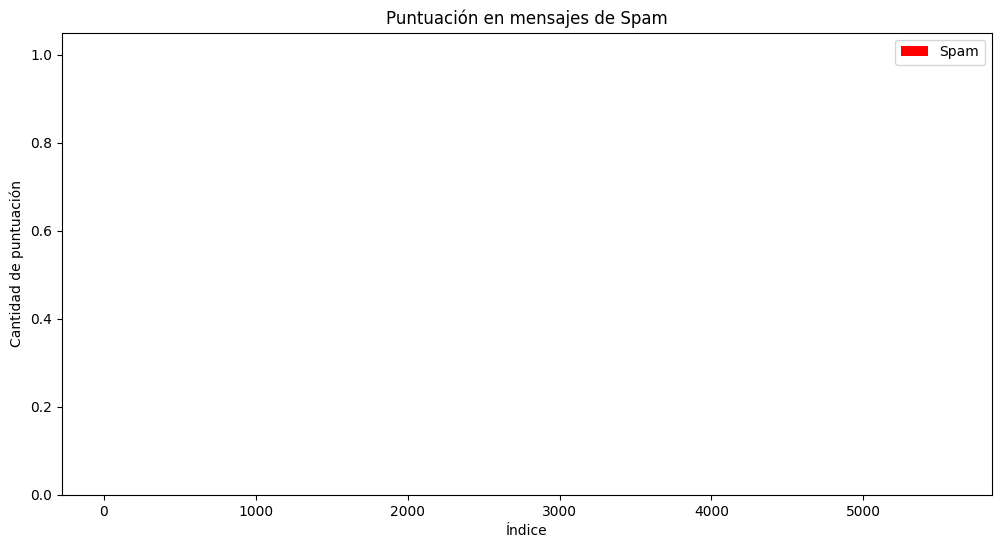

C:\Users\rentt\AppData\Local\Temp\ipykernel_36580\2418406112.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ham_data['punctuation_count'] = ham_data['body_text'].apply(count_punctuation)


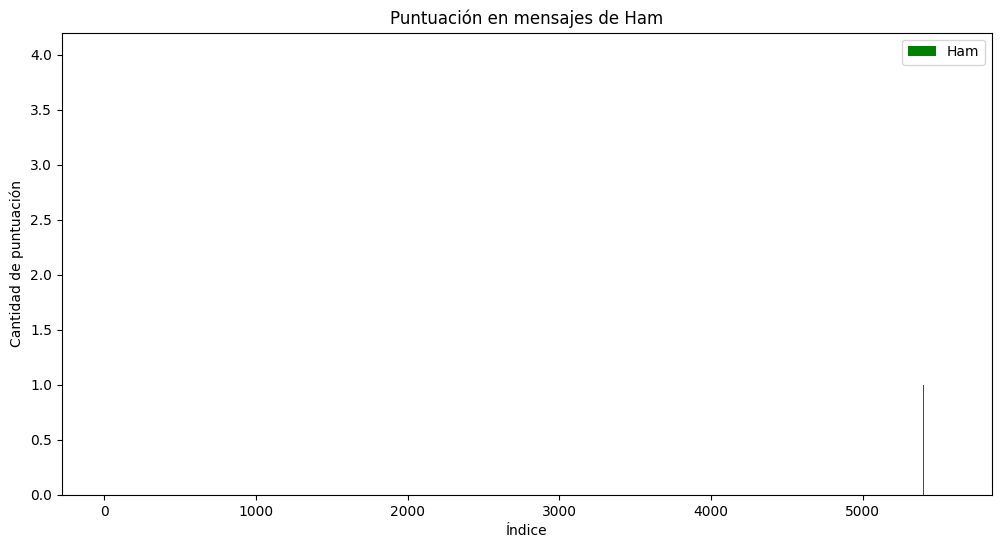

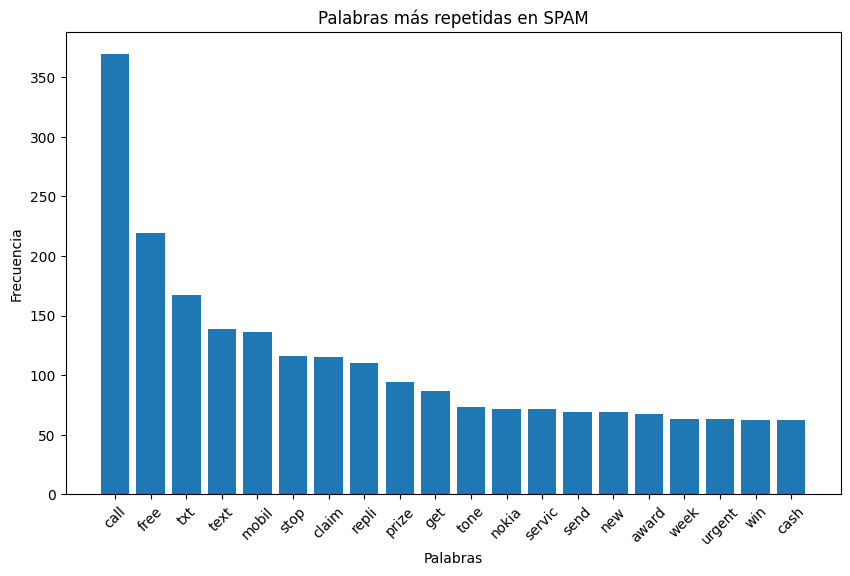

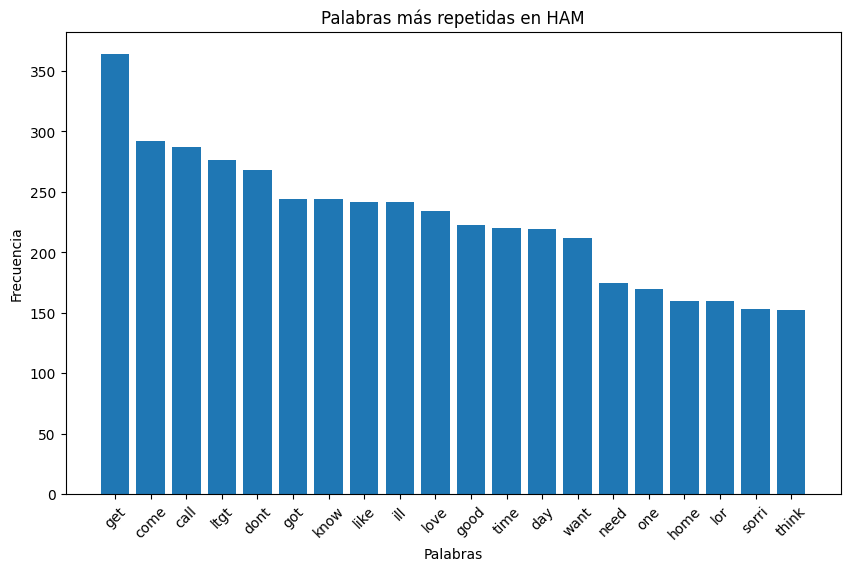

In [12]:
draw_graphs(data)

In [9]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (4457, 2)
Testing data shape: (1115, 2)


In [60]:
# Función para calcular la probabilidad de que un texto sea SPAM dado que contiene la palabra W
def spam_prob_with_word(word):

    data = train_data

    spam_data = data[data['label'] == 'spam']['body_text']
    ham_data = data[data['label'] == 'ham']['body_text']

    # Calcular la probabilidad de SPAM y HAM
    p_spam = len(spam_data) / len(data)
    p_ham = len(ham_data) / len(data)

    # Función para calcular la probabilidad de una palabra en SPAM y HAM
    def word_prob(word, label):
        texts = ' '.join(data[data['label'] == label]['body_text'])
        total_words = len(texts.split())
        word_count = Counter(texts.split()).get(word, 0)
        return word_count / total_words


    p_w_spam = word_prob(word, 'spam')
    p_w_ham = word_prob(word, 'ham')
    p_w = (p_w_spam * p_spam) + (p_w_ham * p_ham)
    
    if p_w > 0:
        p_spam_given_word = (p_w_spam * p_spam) / p_w
        return p_spam_given_word
    else: 
        return 0.001



In [11]:
#Encontrar todas las palabras y usarlas solo una vez
all_words = set()
for text in train_data['body_text']:
    words = text.split()
    all_words.update(words)

# Crear el diccionario de palabras y probabilidades de spam
word_spam_prob = {}
for word in all_words:
    word_spam_prob[word] = spam_prob_with_word(word)

word_spam_prob

{'list': 0.0,
 'mph': 0.0,
 'unbeliev': 0.0,
 'butther': 0.0,
 'ghodbandar': 0.0,
 'wcn': 1.0,
 'dateboxessexcmxn': 1.0,
 'cyst': 0.0,
 'untam': 1.0,
 'ultim': 0.3532438991737621,
 'crap': 0.0,
 'tirunelvali': 0.0,
 'chase': 0.12014002221360866,
 'cancel': 0.42137573024234976,
 'hey': 0.012124844793959307,
 'concert': 0.3532438991737621,
 'latr': 0.0,
 'blu': 1.0,
 'sip': 0.0,
 'jacuzzi': 0.0,
 'wrote': 1.0,
 'duo': 0.0,
 'monthli': 0.21450893608138244,
 'bundl': 1.0,
 'espel': 0.0,
 'delay': 0.0,
 'busyi': 0.0,
 'freemsg': 1.0,
 'ran': 0.0,
 'rayan': 0.0,
 'fml': 0.3532438991737621,
 'xxxxxxxx': 0.0,
 'belliger': 0.0,
 'affair': 0.0,
 'lov': 0.0,
 'team': 0.21450893608138244,
 'kid': 0.0,
 'winaweek': 1.0,
 'newsbi': 0.0,
 'final': 0.4019921936189307,
 'typic': 0.0,
 'idiot': 0.0,
 'yesterday': 0.05721430300252584,
 'jokin': 0.0,
 'insha': 0.0,
 'shldxxxx': 0.0,
 'dime': 0.0,
 'gudnitetcpractic': 0.0,
 'neck': 0.0,
 'amigo': 0.0,
 'noun': 0.0,
 'nothi': 0.0,
 'ppl': 0.0,
 'strike': 0.

In [62]:
word = 'free'
word = preprocess_text(word)
print(f"==>> word: \n{word}")
spam_probability_g_word = word_spam_prob[word]
print(f"==>> spam_probability: \n{spam_probability_g_word}")


==>> word: 
free
==>> spam_probability: 
0.6707047568952761


In [66]:
error = 0

def prob_words_spam(text):
    
    list_words = text.split()
    
    if len(list_words) == 0:
        return 0
    
    
    text_probabilities = {}
    for word in list_words:
        prob = spam_prob_with_word(word)
        
        text_probabilities[word] = prob
    return text_probabilities
        

def prob_text_spam(text):
    
    list_words = text.split()
    
    if len(list_words) == 0:
        return 0
    
    multiplied_probs = 1
    one_minus_multi_prob = 1
    
    for word in list_words:
        prob = spam_prob_with_word(word)
        
        if prob is not None:
            multiplied_probs *= prob
            one_minus_multi_prob *= (1 - prob)
        else: pass

    global error
    
    if multiplied_probs + one_minus_multi_prob == 0:
        error += 1
    # Manejar el caso en el que varias palabras tengan probabilidad de spam igual a 1 y 0
        result = 0.6  # O cualquier otro valor que consideres apropiado
        for word in list_words:
            prob = spam_prob_with_word(word)
        
    else: 
        result = multiplied_probs / (multiplied_probs + one_minus_multi_prob)
    
    return result

def test_model(new_df):
        
    # Calcular la probabilidad de SPAM de cada texto
    new_df['spam_probability'] = new_df['body_text'].apply(lambda x: prob_text_spam(x))

    # Clasificar los textos como SPAM o HAM
    new_df['predicted_label'] = new_df['spam_probability'].apply(lambda x: 'spam' if x > 0.5 else 'ham')

    # Calcular la precisión del modelo
    accuracy = (new_df['label'] == new_df['predicted_label']).mean()

    return new_df, accuracy

In [46]:
df_resultado, accuracy = test_model(test_data)

df_resultado.to_csv("RESULTADOS1.csv")

print(f"\n==>> accuracy: {accuracy}")



==>> accuracy: 0.9497757847533632


==>> conf_matrix: 
[[931  34]
 [ 22 128]]


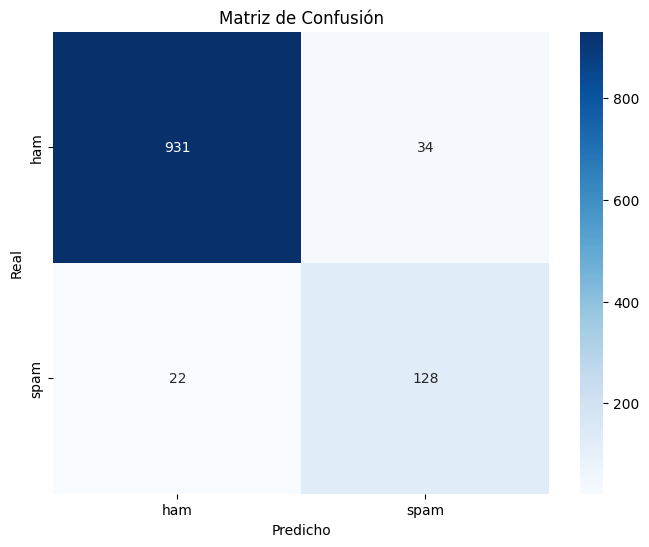

==>> precision: 
0.7901234567901234
==>> recall: 
0.8533333333333334
==>> f1: 
0.8205128205128205


In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np


# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(df_resultado['label'], df_resultado['predicted_label'])
print(f"==>> conf_matrix: \n{conf_matrix}")
labels = ['ham', 'spam']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Calcular la precisión, sensibilidad y F1-score

df_resultado['label_num'] = df_resultado['label'].apply(lambda x: 1 if x == 'spam' else 0)
df_resultado['predicted_label_num'] = df_resultado['predicted_label'].apply(lambda x: 1 if x == 'spam' else 0)

precision = precision_score(df_resultado['label_num'], df_resultado['predicted_label_num'])
print(f"==>> precision: \n{precision}")
recall = recall_score(df_resultado['label_num'], df_resultado['predicted_label_num'])
print(f"==>> recall: \n{recall}")
f1 = f1_score(df_resultado['label_num'], df_resultado['predicted_label_num'])
print(f"==>> f1: \n{f1}")


In [98]:
def SpamHam(text):
    
    print(text)
    
    text = preprocess_text(text)
    
    words_probabilities =  prob_words_spam(text)
    print(f"\n==>> palabras encontradas: \n{words_probabilities}")
    sentence_probability = prob_text_spam(text)
    print(f"==>> probabilidad del texto de ser spam: \n{sentence_probability}")
    
    texto = "El label predicho es:"
    if sentence_probability > 0.5:
        print(f"{texto} SPAM" )
    else:
        print(f"{texto} HAM" )

In [107]:

from IPython.display import display

display("               SPAM CHECKER")
display("Ingrese un texto para verificar si es spam.")

input_text = input(">>   ")

SpamHam(input_text)

'               SPAM CHECKER'

'Ingrese un texto para verificar si es spam.'

"Now, whats your house # again ? And do you have any beer there ?"

==>> palabras encontradas: 
{'what': 0.0, 'hous': 0.017880401184584845, 'beer': 0.0}
==>> probabilidad del texto de ser spam: 
0.0
El label predicho es: HAM


Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm

Bored of speed dating? Try SPEEDCHAT, txt SPEEDCHAT to 80155, if you don't like em txt SWAP and get a new chatter!

I will come tomorrow di

Oh k:)after that placement there ah?

Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now!

URGENT! Your mobile won a 2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU!

I will come tomorrow di

"Now, whats your house # again ? And do you have any beer there ?"